<h1 style="text-align:center">Build and Evaluate Tree Models</h1>
<h2 style="text-align:center">Applied Question 7</h2>
<p style="text-align:center">Robert Evans</p>
<p style="text-align:center">School of Technology & Engineering, National University</p>
<p style="text-align:center">DDS-8555: Predictive Analysis</p>
<p style="text-align:center">Dr. Mohammad Yavarimanesh</p>
<p style="text-align:center">February 16, 2025</p>

## Load Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

In [4]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import (RandomForestRegressor as RF,
                              GradientBoostingRegressor as GBR)
from ISLP.bart import BART

## Load Data

In [5]:
Boston = load_data("Boston")

## Build a Model

In [6]:
model = MS(Boston.columns.drop('medv'), intercept=False)
D = model.fit_transform(Boston)
feature_names = list(D.columns)
X = np.asarray(D)

In [7]:
X_train, X_test, y_train, y_test = skm.train_test_split(X, Boston['medv'], test_size=0.3, random_state=0)

In [8]:
bag_boston = RF(max_features=X_train.shape[1], random_state=0)
bag_boston.fit(X_train, y_train)

RandomForestRegressor(max_features=12, random_state=0)

14.634700151315787

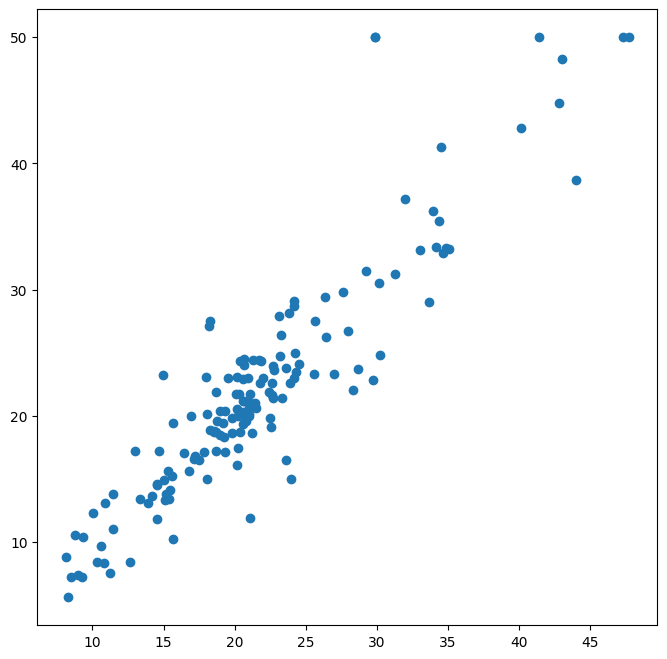

In [10]:
ax = subplots(figsize=(8,8))[1]
y_hat_bag = bag_boston.predict(X_test)
ax.scatter(y_hat_bag, y_test)
np.mean((y_test - y_hat_bag)**2)

In [11]:
bag_boston = RF(max_features=X_train.shape[1], n_estimators=500, random_state=0).fit(X_train, y_train)
y_hat_bag = bag_boston.predict(X_test)
np.mean((y_test - y_hat_bag)**2)

14.605662565263161

In [12]:
bag_boston = RF(max_features=6, random_state=0).fit(X_train, y_train)
y_hat_bag = bag_boston.predict(X_test)
np.mean((y_test - y_hat_bag)**2)

20.04276446710527